In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate, spatial

https://stackoverflow.com/questions/78567599/scipy-bad-interpolation-of-3d-point-cloud?noredirect=1#comment138515679_78567599

In [3]:
grid = pd.read_csv("grid_XY.txt", sep=",", header=None).values
lidar = pd.read_csv("lidar.txt", sep=",", header=None).values

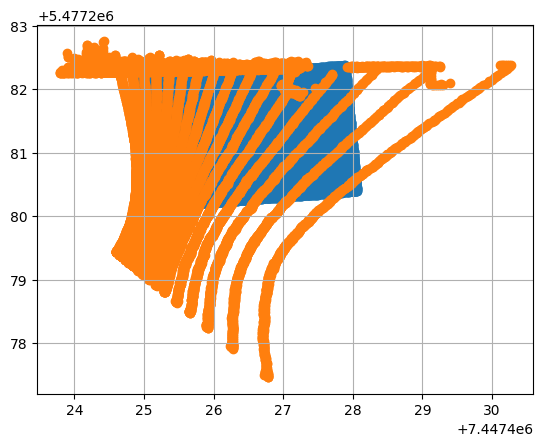

In [4]:
fig, axe = plt.subplots()
axe.scatter(*grid.T)
axe.scatter(*lidar[:,:2].T)
axe.grid()

In [16]:
interpolator = interpolate.SmoothBivariateSpline(*lidar[:,:3].T)#, w=lidar[:,3])

In [17]:
zhat = interpolator(*grid.T, grid=False)

In [18]:
triangulation = spatial.Delaunay(grid)

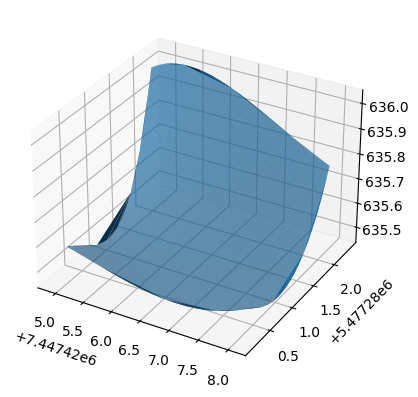

In [19]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.plot_trisurf(*grid.T, zhat)

In [24]:
xmin = grid.min(axis=0)

In [25]:
xmax = grid.max(axis=0)

In [42]:
tx = np.linspace(xmin[0], xmax[0], 50)
ty = np.linspace(xmin[1], xmax[1], 50)

In [43]:
lsq = interpolate.LSQBivariateSpline(*lidar[:,:3].T, tx, ty, eps=1e-16) #, w=lidar[:,3])

/tmp/ipykernel_3421/3589424967.py:1: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=722). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  lsq = interpolate.LSQBivariateSpline(*lidar[:,:3].T, tx, ty, eps=1e-16) #, w=lidar[:,3])


In [44]:
zhat2 = lsq(*grid.T, grid=False)

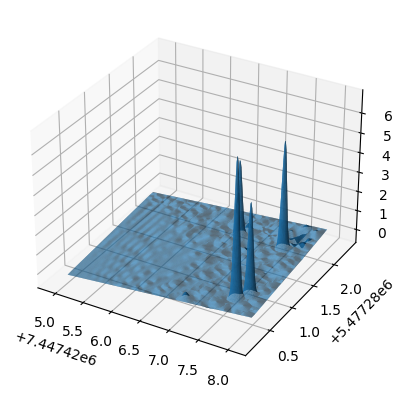

In [45]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.plot_trisurf(*grid.T, zhat2)